### Covariance :

Covariance measures how two variables vary in tandem from their means.

For example: lets say we an e-commerce company is interested in finding a correlation between page-speed and customer spending.

Numpy offers covariation methods, but lets do it the hard way to see what happens under the hood. Basically we treat each vatiable as a vector of deviation from the mean and compute the "dot product" of both vectors. Gemetrically this can be hard as the angle between the two vectors in a high-demensional space, but one can just think of it as a measure of similarities between the two variables.

First, lets just make speed and purchase totally ramdom and independent of each other, one sould find very small covariance in the results.



Convariance: -0.36793151683987857


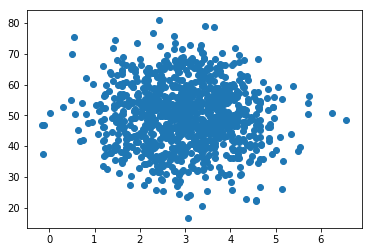

In [20]:
import numpy as np                  # mean function
import scipy as sp                  # dot, ramdom, norm functions
import matplotlib.pyplot as plt     # plotting 


def de_mean(x):                     # deviation from the mean 
    xmean = sp.mean(x)              # calculating the mean
    return [xi - xmean for xi in x] # difference of each data from mean 

def covariance (x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y))/ (n-1) 

#using random to create two data sets 
pageSpeed = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

# using scatter for plot them on a graph
plt.scatter(pageSpeed, purchaseAmount)

# calculating covarriance 
print('Convariance: ' + str(covariance (pageSpeed,purchaseAmount)))

Now, lets make the purchase anount an actual function of the page speed, that should make a very real correlation between the two. The far from zero (negative value in this case) indicates an inverse relationship:

Important thing to rmember: correlation doesn't imply causation. Only a controlled, ramdomised experiment can give meaningful insight on caustion

-10.20922039951738

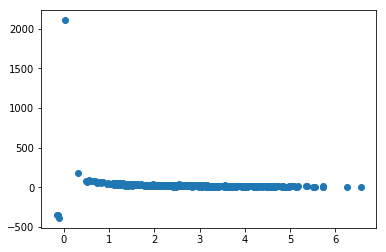

In [23]:
purchaseAmount = np.random.normal(50.0,10.0,1000)/ pageSpeed

plt.scatter(pageSpeed, purchaseAmount)

covariance(pageSpeed, purchaseAmount)

### Correlation
In the last two examples we saw values close to zero and far from zero. Buthow far is far ? or how close is close ? this is where correlation comes handy. It makes everything normal by standard deviation. 

In [25]:
def correlation (x, y):
    stddev_x = x.std() 
    stddev_y = y.std()
    return covariance(x,y)/ stddev_x / stddev_y   # devide by std of both

correlation(pageSpeed, purchaseAmount) 

-0.14824925452573642

Numpy can can do this with numpy.corrcoef function. It returns a matrix of the correlation coefficients between every combination of the arrays passed in:

In [27]:
np.corrcoef(pageSpeed,purchaseAmount)

array([[ 1.        , -0.14810101],
       [-0.14810101,  1.        ]])

This output array is actually every possible combination of the sets of data that your have passed in: So the '0' index says 1 which means it has perfect correlation comparing page-speed to itself, the 1 st index compared correlation between page-speed and purchase-amount which is set up to be inverse; that's why it's negative, and the 3rd index of the array is also 1 means perfect correlation because it's compared between purchase-amount with itself. 

#### Perfect Correlation 